In [2]:
# #pip install
# %pip install scikit-learn
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
# %pip install imblearn

In [36]:
#imports
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [26]:
#treinamentos
def knnFit(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=100)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia KNN:", acuracia,'%')
    return model
def gaussian(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    model = gnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia gaussian:", acuracia,'%')
    return model
def bernoullin(X_train, y_train, X_test, y_test):
    bnb = BernoulliNB()
    model = bnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia Bernoulli:", acuracia,'%')
    return model

In [41]:
#utils
import warnings
warnings.filterwarnings("ignore")
def shuffle(X, y):
    return train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)

def eliminacaoSequencial(X_train, y_train, X_test, y_test):
    # Converte indices para um array booleano compatível com numpy
    indices = np.ones(len(X_train), dtype=bool)
    
    for i in range(len(X_train)):
        # Temporariamente desativa o índice `i`
        indices[i] = False
        
        # Treina o modelo sem o ponto `i`
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X_train[indices], y_train[indices])
        
        # Verifica se o ponto removido ainda é classificado corretamente
        pred = model.predict([X_train.iloc[i].values])
        if pred != y_train.iloc[i]:
            # Mantém o ponto se não for corretamente classificado
            indices[i] = True

    print("Quantas amostras de treino sobraram:", np.sum(indices))

    # Re-treina o modelo com o conjunto de dados reduzido
    model = KNeighborsClassifier(n_neighbors=100)
    model.fit(X_train[indices], y_train[indices])

    # Faz a predição e avalia o desempenho
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("Acurácia final:", accuracy)

def insercaoSequencial(X_train, y_train, X_test, y_test):
    indices = []
    for _ in range(len(X_train)):
        indices.append(False)

    # inclui a primeira amostra ja que o modelo nunca vai acertar
    indices[0] = True

    # faz a logica de tentar inserir cada registro e ver se está correto
    for i in range(1,len(X_train)):
        model = KNeighborsClassifier(n_neighbors = 100)
        model.fit(X_train[indices], y_train[indices])

    pred = model.predict([X_train.values[i]])
    if pred != y_train.values[i]:
        indices[i] = True

    print("Quantas amostras de treino sobraram:", len(X_train[indices]))

    # calcula o resultado final depois das insercoes

    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train[indices], y_train[indices])
    pred = model.predict(X_test)

    print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


# Classificação se a pessoa bebe ou nao




In [6]:
def loadDataset()-> DataFrame:
    return pd.read_csv('dataset/bebe.csv')

dt = loadDataset()
dt.drop(columns=['SMK_stat_type_cd'])
# print(dt.columns)
print(Counter(dt.DRK_YN	))
print('esta balanceado')


print('dataset antes -> registros', len(dt))

# dt = loadDataset()
# display(dt.describe())
# display(dt.columns)
# display(dt['isDead'].describe())
# print('contagem de valores nulos',dt.isnull().sum())
# print(Counter(dt['isDead']),'\n podemos notar que não está desbalanceado o valor entre as classes, sendo que temos 4926 dados em que o player morreu e 14954 em que o player ficou vivo')


Counter({'N': 495858, 'Y': 495488})
esta balanceado
dataset antes -> registros 991346


In [7]:
print('dataset dps')
duplicated = dt.duplicated()
print('linhas duplicadas', len(duplicated[duplicated==True]))
dt = dt.drop_duplicates()
print('novo tamanho do datase',len(dt))
print('diferenca entre classes Y', Counter(dt['DRK_YN']))
#diferença pequena entre classes nao sera necessario balancear

dataset dps
linhas duplicadas 26
novo tamanho do datase 991320
diferenca entre classes Y Counter({'N': 495844, 'Y': 495476})


In [8]:
# print('preciso rebalancear')
# dtX = dt
# dtY = dt['DRK_YN']
# ros = over_sampling.RandomOverSampler(sampling_strategy='auto', random_state=42)
# print(dt.duplicated().sum())
# X_res, y_res = ros.fit_resample(dtX, dtY)
# y_res = pd.DataFrame(y_res, columns=["DRK_YN"])
# X_res = pd.DataFrame(X_res, columns=dt.columns[:-1])


# print('novo conjunto apos oversampler',Counter(y_res['DRK_YN']))

# dt2 = pd.concat([X_res.reset_index(drop=True), y_res.reset_index(drop=True)], axis=1)

# print(dt2.head(5))
# dup = dt2.duplicated()
# print(dup.sum())
# print(len(dup[dup == True]))


In [9]:
isNullDt = dt.isnull()
isNullDt.sum()
#nao tem null

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

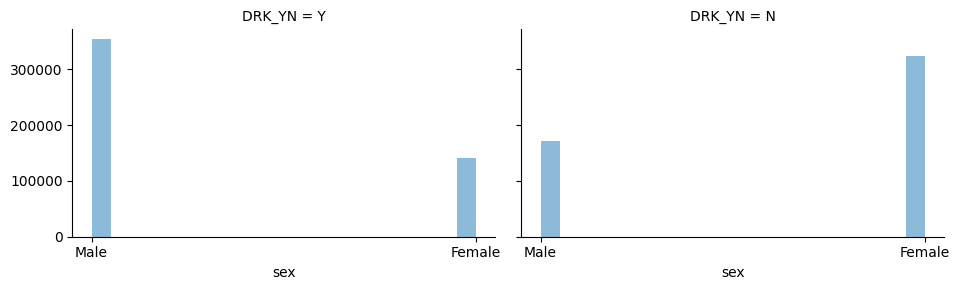

In [10]:

grid = sns.FacetGrid(dt, col='DRK_YN', aspect=1.6)
grid.map(plt.hist, 'sex', alpha=.5, bins=20)
grid.add_legend()

#em vez de one-hot-encoded vamos passar 1 para homem e 0 para mulher sabendo que os homens sao mais propicios a beber...como mostrado no dataset
dt2 = dt.copy()
dt2['sex'] = dt2['sex'].map({
    'Male': 1,
    'Female' : 0
})

dt2['DRK_YN'] = dt2['DRK_YN'].map({
    'Y':1,
    'N':0
})#so para conseguir ver a correlacao


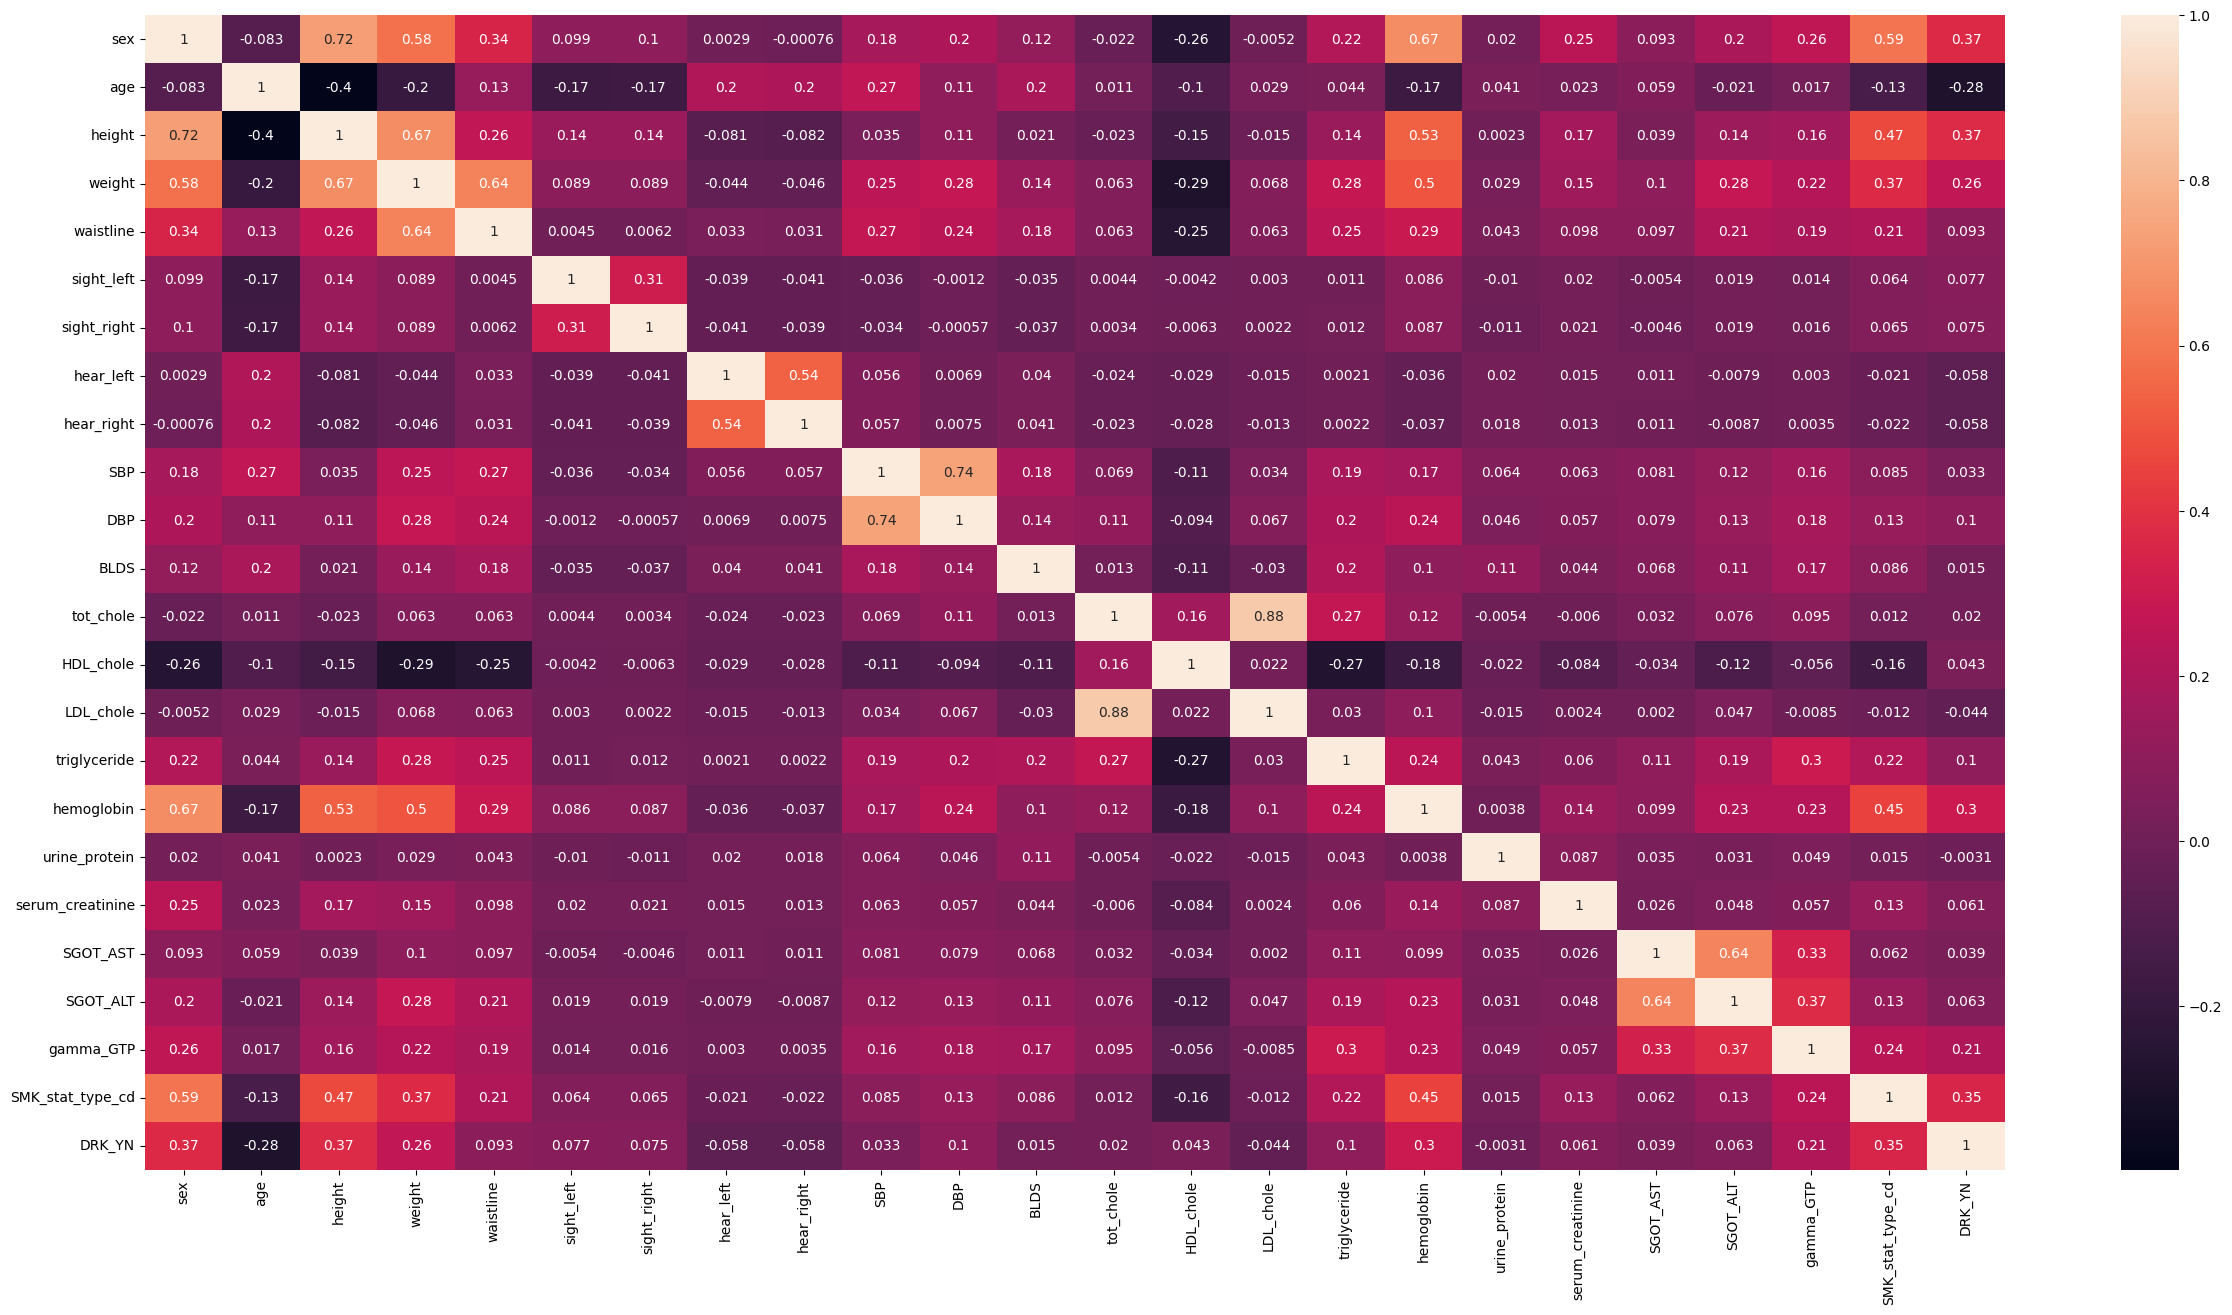

sex                 0.368721
age                -0.284586
height              0.374560
weight              0.264282
hemoglobin          0.299342
gamma_GTP           0.205092
SMK_stat_type_cd    0.350782
DRK_YN              1.000000
Name: DRK_YN, dtype: float64
['sex', 'age', 'height', 'weight', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']


In [16]:
plt.figure(figsize=(30, 15))  # Ajuste os valores conforme necessário
sns.heatmap(dt2.corr(), annot=True,
        xticklabels=dt2.columns,
        yticklabels=dt2.columns,)

plt.show()
corr = dt2.corr()
targetColumnCorr = corr.DRK_YN
goodColumns = targetColumnCorr[(targetColumnCorr >= 0.2) | (targetColumnCorr <= -0.2)]
print(goodColumns)
columns = goodColumns.index.tolist()
print(columns)
##### filtro as colunas que tem uma boa correlacao


dt3 = dt2.copy().get(columns)


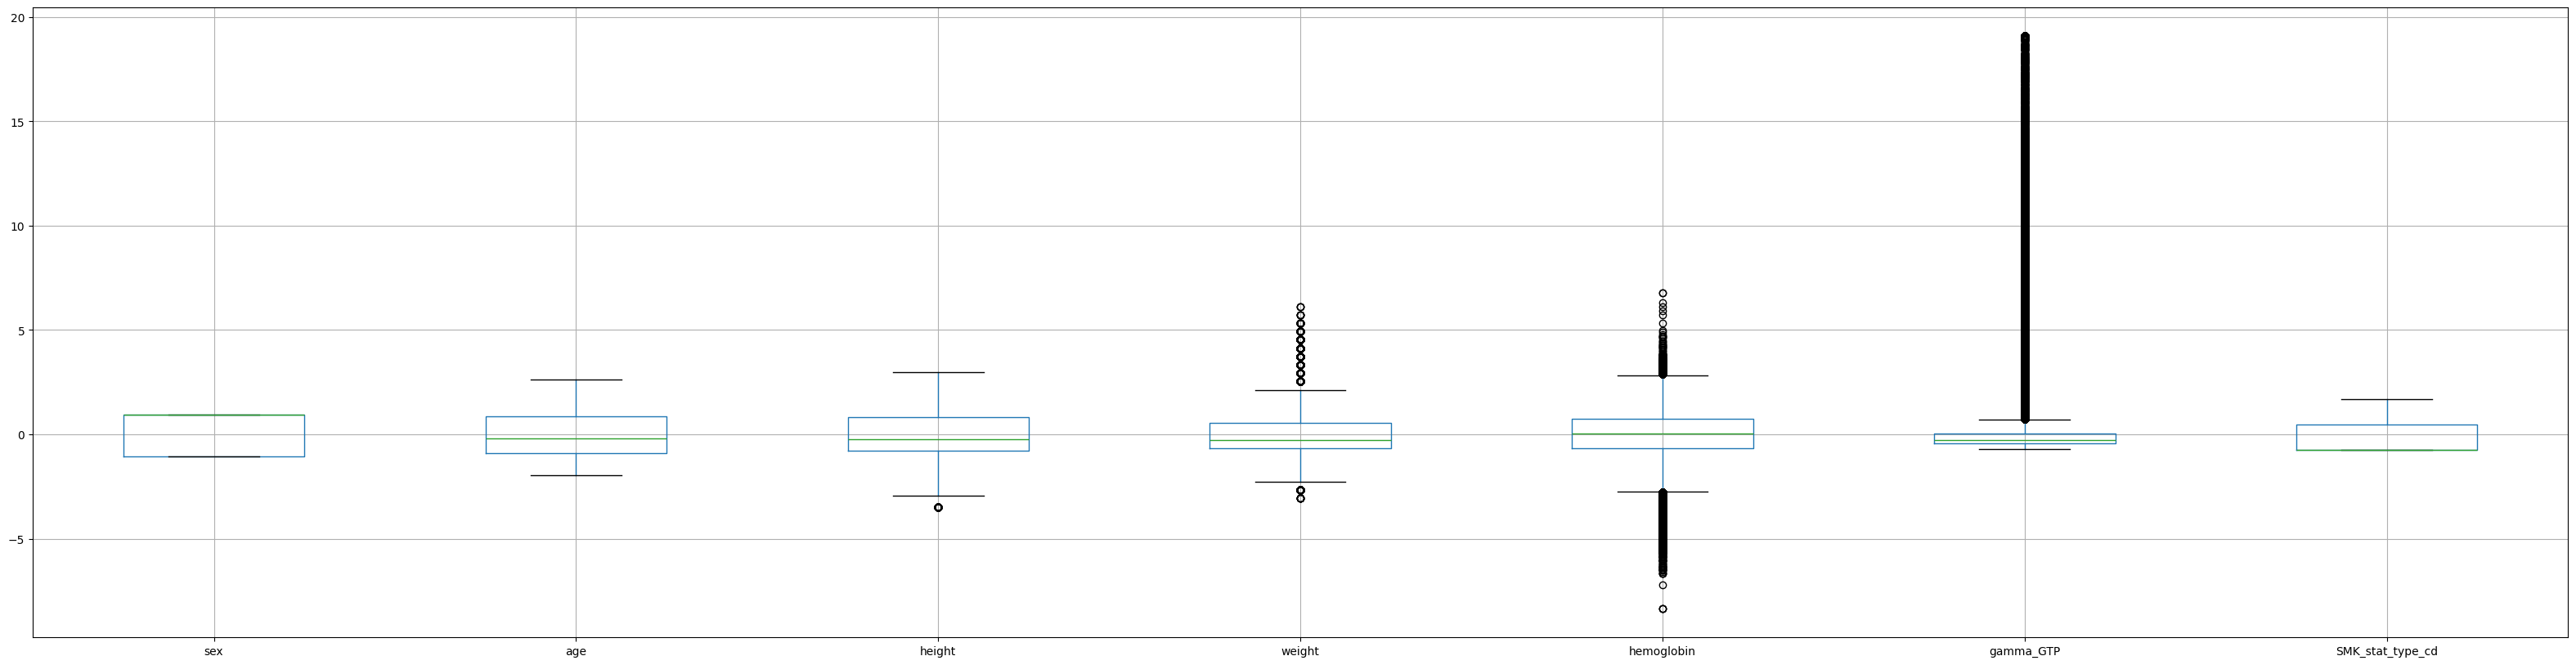

In [28]:
#outliers
dt3X = dt3.copy().drop(columns=['DRK_YN'])
dt3Y = dt3.copy()['DRK_YN']
scaler = StandardScaler()
dt3X = pd.DataFrame(scaler.fit_transform(dt3X), columns=dt3X.columns)
dt3X.boxplot(figsize=(40,10))
plt.show()

<Axes: >

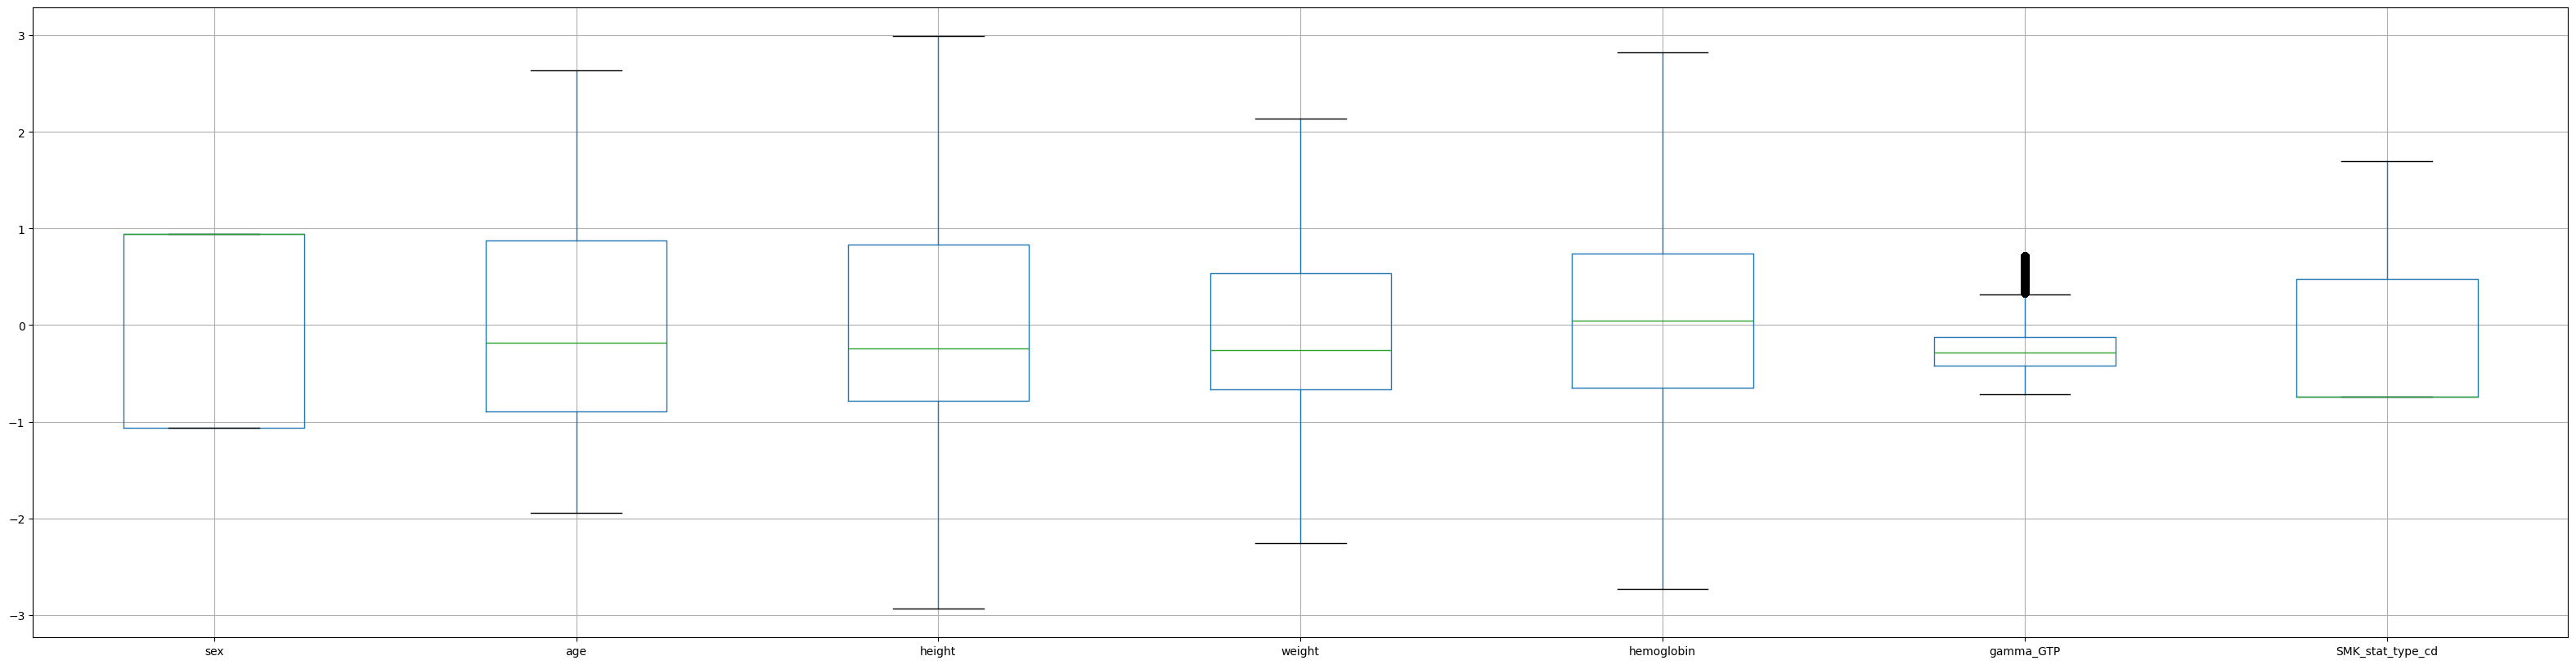

In [29]:
#tratativa do outlier
for col in dt3X.columns:
    Q1 = dt3X[col].quantile(0.25)
    Q3 = dt3X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dt3X[col] = np.where(dt3X[col] < lower_bound, dt3X[col].median(), dt3X[col])
    dt3X[col] = np.where(dt3X[col] > upper_bound, dt3X[col].median(), dt3X[col])

dt3X.boxplot(figsize=(40,10))
# dt3X = dt3X.drop(columns=['gamma_GTP'])#muito outlier para pouca correlacao


In [43]:
X_train, X_test, y_train, y_test = shuffle(dt3X, dt3Y)
# knnFit(X_train, y_train, X_test, y_test)
# bernoullin(X_train, y_train, X_test, y_test)
# gaussian(X_train, y_train, X_test, y_test)


In [ ]:
insercaoSequencial(X_train, y_train, X_test, y_test)

In [ ]:
eliminacaoSequencial(X_train, y_train, X_test, y_test)
